# 线性判别分析

LDA是一种有监督的降维方式，也可用于分类
核心思想是将高维的数据特征投影到一个更低维度的空间中去，使得投影后的数据各类内部的方差最小、各类之间的方差最大

## 1 瑞利熵与广义瑞利熵

在正式推到LDA之前需要介绍下瑞利熵与广义瑞利熵.

瑞利熵的定义：
$
    R(A,x)=\frac{x^HAx}{x^Hx}
$

其中

   x是一个非零的向量
   
   $x^H$是x的共轭转置矩阵
   
   A是一个厄米特矩阵-其共轭转置矩阵等于自己$\rightarrow  A^H=A$
 
 瑞利熵有一个很重要的特性，它的最大值等于矩阵A的最大特征值，最小值等于矩阵A的最小特征值。
 
 广义瑞利熵的定义：
 $
     R(A,B,x)=\frac{x^HAx}{x^HBx}
 $
 该式的最大值是$B^-1A$的最大特征值，最小值是$B^-1A$的最小特征值

## 2 二分类LDA的推导

定义样本集合为
$D((x_1,y_1),(x_2,y_2)...(x_n,y_n))$  其中$x_i$是一个向量，$y_i\in(0,1)$

定义$N_j(j \in(0,1))$为第j类样本的总个数

$X_j(j \in (0,1))$是第j类样本

$u_j(j \in (0,1))$是第j类样本的均值向量，$u_j=\frac{1}{N_j}\sum x$

$\sum j(i \in (0,1))$是第j类样本的协方差矩阵,$\sum j=\frac{\sum(x-u_j)(x-u_j)^T}{N_j} $

$w$是我们映射的直线，向量u经过直线w映射之后其值为$w^Tu$

那么类之间的距离最大即为:  $||w^Tu_0-w^Tu_1||^2_2$

类之间的距离应该尽可能小: $w^T\sum_0w+w^T\sum_1w$

目标函数即可写成: $arg max J(w)=\frac{||w^Tu_0-w^Tu_1||^2_2}{w^T(\sum_0+\sum_1)w}=\frac{w^T(u_0-u_1)(u_0-u_1)^Tw}{w^T(\sum_0+\sum_1)w}$

既是一个广义瑞利熵形式


##  3 LDA 与PCA的比较

相同点：

    都可用于数据降维
    
    都是假设数据符合高斯分布
    
不同点：

    LDA是有监督的，PCA是无监督
    
    LDA最多可以降到k-1维，PCA则没有这个限制
    
    LDA的思路是类内方差最小，类间方差最大，PCA则有两种标准一种是样本点所求平面上的方差尽可能大，一种则是样本点到平面上的距离尽可能小

## 4 LDA 的优缺点

优点:

是一种有监督的方法，能够充分利用先验知识

当样本分类依赖均值的时候表现较好

缺点：

最大只能将数据将到k-1维，超过这个则不行

样本数据符合高斯分布

当样本分类依赖方差的时候表现不好

有可能会过拟合


## 5 scikit-learn中LDA的使用

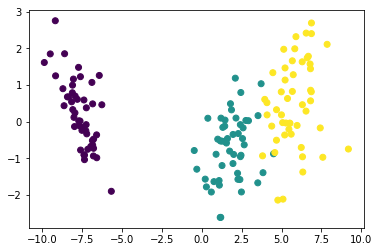

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=datasets.load_iris()
iris_data=iris['data']
iris_label=iris['target']
iris_target_name=iris['target_names']
X=np.array(iris_data)
Y=np.array(iris_label)

fig = plt.figure()

##绘制3D的这个要跟下面绘制lda的分开运行
#ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20) 
#ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o',c=Y)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,Y)
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=Y)